# I. Business Problem & Data Understanding

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import normaltest

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_clv = pd.read_csv('data_customer_lifetime_value.csv')
df_clv.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


Divisi Development dari sebuah perusahaan asuransi mobil ingin melakukan prediksi skor customer lifetime value (CLV) bagi para pelanggannya. Customer Lifetime Value atau disingkat dengan CLV merupakan sebuah prediksi atas nilai total pendapatan yang bisa perusahaan dapatkan dari satu pelanggan. CLV adalah nilai yang penting untuk diketahui karena membantu perusahaan membuat keputusan tentang berapa banyak uang yang akan diinvestasikan untuk mendapat pelanggan baru dan mempertahankan pelanggan yang sudah ada.

Pada project kali ini business objective yang hendak dicapai adalah untuk memperoleh sistem prediksi yang dapat digunakan untuk mengetahui aspek apa saja yang memengaruhi perolehan hasil customer lifetime value (CLV) dari sebuah perusahaan asuransi mobil. Keluaran yang diharapkan yaitu prediksi hasil customer lifetime values dari suatu pelanggan. 

Pendekatan machine learning yang diterapkan pada project ini adalah supervised learning berupa regression problem. Sistem akan memprediksi nilai kontinu berupa customer lifetime value score. Untuk permulaan, root mean squared error akan digunakan sebagai rangkuman pengukuran error pada model prediksi. Apabila nanti ditemukan pencilan pada error model, metrik lain seperti mean absolute error akan dipertimbangkan. Kemudian R-squared akan dihitung untuk melihat seberapa baik model dalam menjelaskan data yang ada.

Pada tabel dataset diatas terdapat beberapa kolom informasi yang akan dijadikan sebagai fitur untuk melakukam pemodelan algorima machine learning untuk memprediksi hasil dari customer lifetime value suatu pelanggan. Data kolom tersebut antara lain :
- Vehicle Class : data kelas kendaraan dari mobil pelanggan
- Coverage : data jenis cakupan asuransi oleh tiap pelanggan
- Renew Offer Type : data jenis penawaran perpanjangan dari tiap pelanggan
- Employment Status : data status pekerjaan masing-masing pelanggan
- Marital Status : data status perkawinan tiap pelanggan
- Education : data pendidikan terakhir tiap pelanggan
- Number of Policies : data jumlah polis yang dimiliki oleh masing-masing pelanggan
- Monthly Premium Auto : data pembayaran angsuran premium bulanan otomatis dari tiap pelanggan
- Total Claim Amount : data total jumlah klaim dari tiap pelanggan
- Income : data total penghasilan dari tiap pelanggan
- Customer Lifetime Value : data nilai customer lifetime value dari masing-maisng pelanggan

# II. Data Cleaning

Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menggunakan algoritma machine learning.

In [3]:
#check info data

df_clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Dari info diatas terlihat bahwa secara keseluruhan terdapat 5669 baris data dengan total 11 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Total ada 5 data numerik dan 6 data kategorikal . Jika melihat informasi pada non-null values atau data yang tersedia pada setiap kolomnya tersebut, semua kolom atau feature memiliki data yang lengkap.

## a. Missing Values

In [4]:
#check missing value

df_clv.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Dari pengecekan missing values diatas terlihat bahwa tidak ada data yang kosong. Sehingga kita tidak perlu melakukan penanganan untuk jumlah data yang berbeda.

## b. Duplicate Data

In [5]:
#check duplicate data

df_clv[df_clv.duplicated()]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


Selanjutnya kita juga akan mengecek duplikasi data. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis dan permodelan. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja.

Dari data diatas dapat dilihat terdapat duplikasi data sejumlah 618. Oleh karena itu, data-data tersebut akan dihapus untuk keperluan proses analisis dan pemodelan.

In [6]:
df_clv = df_clv.drop_duplicates()
df_clv.shape

(5051, 11)

Setelah data duplikasi dihapus, maka total data yg akan digunakan untuk keperluan analisis dan pemodelan sebanyak 5051 baris dengan 11 kolom.

## c. Data Outlier

In [7]:
#cek outlier

kolom=['Number of Policies','Monthly Premium Auto','Total Claim Amount','Income','Customer Lifetime Value']
kolom_out=[]
for i in kolom:
    q1=df_clv[i].describe()['25%']
    q3=df_clv[i].describe()['75%']
    iqr=q3-q1
    out1=q3+1.5*iqr
    out2=q1-1.5*iqr
    index_out=(df_clv.loc[(df_clv[i]>out1)|(df_clv[i]<out2)]).index
    n_out=df_clv.loc[index_out][i].count()
    kolom_out.append(f'{n_out}')
    
pd.DataFrame({'jumlah outlier':kolom_out},index=kolom)

,jumlah outlier
Number of Policies,228
Monthly Premium Auto,252
Total Claim Amount,217
Income,0
Customer Lifetime Value,449


In [8]:
def outlier(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  outliers = []

  for data in column:
    if (data > (Q3 + 1.5 * IQR)) | (data < (Q1 - 1.5 * IQR)):
      outliers.append(data)

  return outliers

In [9]:
df_clv_cleaned1 = df_clv[~df_clv['Number of Policies'].isin(outlier(df_clv['Number of Policies']))]
df_clv_cleaned2 = df_clv_cleaned1[~df_clv_cleaned1['Monthly Premium Auto'].isin(outlier(df_clv['Monthly Premium Auto']))]
df_clv_cleaned3 = df_clv_cleaned2[~df_clv_cleaned2['Total Claim Amount'].isin(outlier(df_clv['Total Claim Amount']))]
df_clv_cleaned = df_clv_cleaned3[~df_clv_cleaned3['Customer Lifetime Value'].isin(outlier(df_clv['Customer Lifetime Value']))]

print('Before removing outliers :', df_clv.shape)
print('After removing outliers :', df_clv_cleaned.shape)

Before removing outliers : (5051, 11)
After removing outliers : (4131, 11)


Dari hasil diatas terlihat bahwa beberapa fitur memiliki data outlier, hanya fitur Income yang tidak memiliki outlier. Lalu, setelah kita melakukan pengahapusan data outlier tersebut, data kita yang semula terdiri dari 5051 baris dengan 11 kolom berubah menjadi terdiri dari 4131 baris dengan 15 kolom. Data ini lah yang nanti akan kita proses untuk pemodelan selanjutnya.

## d. General Info Cleaned Data

Berikut ini merupakan informasi umum dari data yang telah dibersihkan dari anomali-anomali sebelumnya.

In [255]:
#check Some Info

listItem = []
for col in df_clv_cleaned.columns :
    listItem.append([col, df_clv_cleaned[col].dtype, len(df_clv_cleaned),df_clv_cleaned[col].isna().sum(),
                    round((df_clv_cleaned[col].isna().sum()/len(df_clv_cleaned[col])) * 100,2),
                    df_clv_cleaned[col].nunique(), list(df_clv_cleaned[col].drop_duplicates().sample(3).values)])

df_clvDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
df_clvDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,Vehicle Class,object,4131,0,0.0,4,"[SUV, Sports Car, Two-Door Car]"
1,Coverage,object,4131,0,0.0,3,"[Basic, Premium, Extended]"
2,Renew Offer Type,object,4131,0,0.0,4,"[Offer3, Offer4, Offer2]"
3,EmploymentStatus,object,4131,0,0.0,5,"[Unemployed, Disabled, Retired]"
4,Marital Status,object,4131,0,0.0,3,"[Divorced, Married, Single]"
5,Education,object,4131,0,0.0,5,"[College, Master, Doctor]"
6,Number of Policies,float64,4131,0,0.0,8,"[5.0, 6.0, 2.0]"
7,Monthly Premium Auto,float64,4131,0,0.0,99,"[154.0, 157.0, 160.0]"
8,Total Claim Amount,float64,4131,0,0.0,2621,"[65.425125, 754.358929, 325.395532]"
9,Income,float64,4131,0,0.0,3018,"[45302.0, 25630.0, 63621.0]"


# III. Exploratory Data Analysis

## a. Statistik Deskriptif

Berikut ini merupakan deskriptif statistik data untuk data numerik yang ada pada tabel sebelumnya. Statistik deskriptif ini menggunakan fungsi .describe() dan akan menampilkan informasi statistik antara lain : jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil 1, kuartil 2, kuartil 3, dan nilai maksimum.

In [256]:
#statistik deskriptif untuk data numerikal

df_clv_cleaned.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4131.000000,4131.000000,4131.000000,4131.000000,4131.000000
mean,2.757928,85.759380,381.506766,38308.892520,6085.662971
std,2.112222,22.016496,210.361002,30688.738269,3224.563870
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,244.335430,0.000000,3434.105577
50%,2.000000,77.000000,355.200000,34974.000000,5292.632491
75%,4.000000,103.000000,514.814997,62886.500000,8008.213789
max,8.000000,170.000000,989.200247,99934.000000,16589.712370


Sedangkan berikut ini merupakan deskriptif statistik data untuk data kategorikal. Statistik deskriptif ini menggunakan fungsi .describe(include=object) dan akan menampilkan informasi statistik antara lain : jumlah data, jumlah nilai unik, data dengan jumlah terbanyak, dan frekuensi data dengan jumlah terbanyak.

In [257]:
#statistik deskriptif untuk data kategorikal

df_clv_cleaned.describe(include=object)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,4131,4131,4131,4131,4131,4131
unique,4,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2258,2616,1589,2643,2480,1266


## b. Distribusi Data

In [258]:
#cek distribusi data

kolom = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']
distribusi=[]
for i in kolom:
    stats, pval=normaltest(df_clv_cleaned[i])
    if pval>0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')
        
pd.DataFrame({'distribusi':distribusi},index=kolom)

,distribusi
Number of Policies,tidak normal
Monthly Premium Auto,tidak normal
Total Claim Amount,tidak normal
Income,tidak normal
Customer Lifetime Value,tidak normal


Dari uji normalitas data diatas dapat disimpulkan bahwa fitur Number of Policies, Monthly Premium Auto, Total Claim Amount, Income, dan Customer Lifetime Value memiliki distribusi data yang tidak normal dikarenakan nilai p-value dari ketiga fitur tersebut lebih kecil dari 0.05. Hal ini bisa dikatakan ketiga fitur tersebut termasuk dalam kategori non-parametrik.

## c. Analisis Data Target (y)

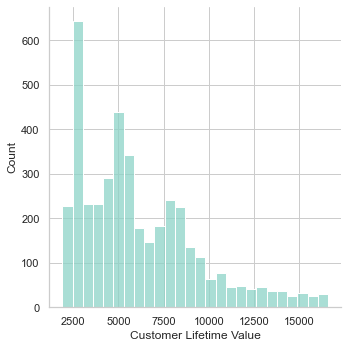

In [260]:
sns.displot(x = 'Customer Lifetime Value', data = df_clv_cleaned)

In [261]:
df_clv_cleaned['Customer Lifetime Value'].describe()

count     4131.000000
mean      6085.662971
std       3224.563870
min       1898.007675
25%       3434.105577
50%       5292.632491
75%       8008.213789
max      16589.712370
Name: Customer Lifetime Value, dtype: float64

Berdasarkan grafik distplot diatas terlihat bahwa data target yaitu kolom Customer Lifetime Value memiliki ditribusi data yang tidak normal. Dimana data tersebut memiliki nilai rata-rata sekitar 6085 dan nilai standar deviasi sekitar 3224 dengan nilai tertinggi nya yaitu sekitar 16589 dan nilai terendah nya sekitar 1898, sehingga terdapat distribusi data yang memiliki rentang sangat jauh.

## d. Korelasi Data Variabel (X) dengan Data Target (y)

Disini kita akan melihat korelasi antara data variabel (X) dengan data target (y) yaitu Customer Lifetime Value. Data varibel (X) terdiri dari fitur kolom kategorik dan fitur kolom numerik.

In [262]:
#categorical features

cat_features = [feature for feature in df_clv_cleaned.columns if (df_clv_cleaned[feature].dtypes == 'O')]
cat_features

['Vehicle Class',
 'Coverage',
 'Renew Offer Type',
 'EmploymentStatus',
 'Marital Status',
 'Education']

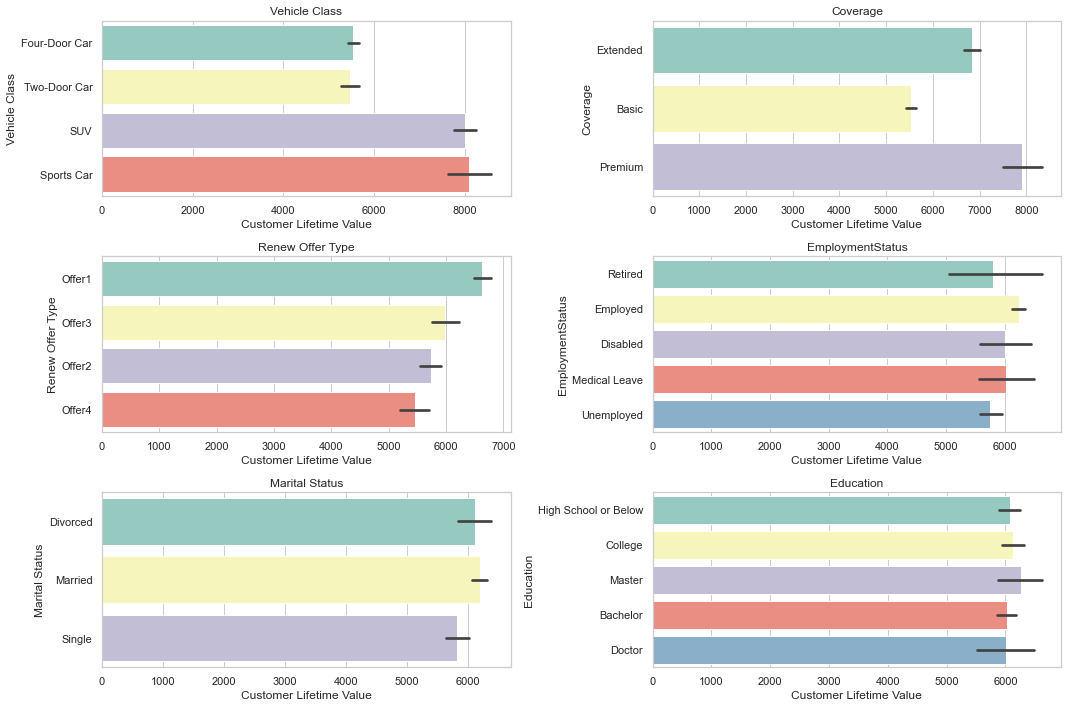

In [263]:
plt.figure(figsize=(15, 10), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in cat_features:
    ax = plt.subplot(3, 2, plotnumber)
    sns.barplot(x = 'Customer Lifetime Value', y = feature, data = df_clv_cleaned)
    plt.xlabel('Customer Lifetime Value')
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout();

In [264]:
df_clv_cleaned.groupby('Vehicle Class')['Customer Lifetime Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Four-Door Car,2258.0,5542.446047,2901.788989,1904.000852,2934.429881,5120.488803,7235.484365,16548.85665
SUV,737.0,8003.515932,3426.210575,3099.538005,4603.975141,8186.095915,9800.336360,16589.71237
Sports Car,196.0,8097.188885,3428.368809,3074.105486,4863.557858,8154.665832,10267.577785,16280.19859
Two-Door Car,940.0,5467.436485,3004.595457,1898.007675,2862.351649,4943.851421,7083.382426,16510.96722


In [265]:
df_clv_cleaned.groupby('Coverage')['Customer Lifetime Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Coverage,,,,,,,,
Basic,2616.0,5535.930046,3000.860832,1898.007675,2786.350441,4991.799206,7530.155990,16525.38067
Extended,1238.0,6839.056610,3323.747632,2549.450038,3732.488114,6309.661284,9404.018011,16553.23422
Premium,277.0,7910.211727,3464.916256,3362.670123,4373.358260,8078.530850,9452.996411,16589.71237


In [266]:
df_clv_cleaned.groupby('Renew Offer Type')['Customer Lifetime Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Renew Offer Type,,,,,,,,
Offer1,1589.0,6629.579805,3222.555279,1898.007675,4328.864771,5811.918112,8456.268179,16589.71237
Offer2,1275.0,5733.917509,3211.991899,2009.772923,2926.675729,4961.574919,7640.521373,16548.85665
Offer3,722.0,5987.625530,3193.456504,1898.683686,3383.468486,5237.712831,7903.246068,16531.70376
Offer4,545.0,5452.588926,3062.460039,2121.313061,2891.272351,4838.208972,6945.016955,16373.72730


In [267]:
df_clv_cleaned.groupby('EmploymentStatus')['Customer Lifetime Value'].describe()

,count,mean,std,min,25%,50%,75%,max
EmploymentStatus,,,,,,,,
Disabled,179.0,6002.823597,3111.584816,2242.090803,3673.772663,5004.310469,7994.929742,15363.84716
Employed,2643.0,6237.692311,3240.435779,2255.312942,3498.956861,5441.420130,8177.405952,16589.71237
Medical Leave,190.0,6018.821151,3452.882338,2272.335352,3255.404376,4928.333220,8120.549959,16355.31386
Retired,71.0,5802.589038,3416.896875,2227.072755,3132.354181,4650.063763,7700.324054,16473.16905
Unemployed,1048.0,5747.698179,3124.036037,1898.007675,3230.750856,4934.073361,7551.771185,16468.22079


In [268]:
df_clv_cleaned.groupby('Marital Status')['Customer Lifetime Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,576.0,6112.831523,3188.960067,2004.350666,3450.700360,5300.141705,8015.758012,16477.47799
Married,2480.0,6191.635067,3234.894899,2141.750757,3527.996085,5415.655592,8110.578148,16589.71237
Single,1075.0,5826.630520,3208.100209,1898.007675,3254.774047,4941.650159,7580.103254,16548.85665


In [269]:
df_clv_cleaned.groupby('Education')['Customer Lifetime Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,1266.0,6024.775391,3201.030619,1898.007675,3352.825360,5242.485265,7893.771477,16589.71237
College,1230.0,6123.673468,3278.254746,1898.683686,3455.711565,5270.020110,8078.469376,16510.96722
Doctor,167.0,6011.906412,3297.172915,2267.604038,3095.124134,5332.462694,8045.107360,16553.23422
High School or Below,1154.0,6074.855503,3135.308475,1940.981221,3489.683367,5340.987128,7992.602565,16525.38067
Master,314.0,6261.204143,3399.400939,2272.307310,3381.857284,5443.285907,8277.824387,16531.70376


Berdasarkan grafik dan analisis deskriptif diatas dapat disimpulkan bahwa pada fitur Vehicle Class memiliki ragam nilai Customer Lifetime Value (CLV) di tiap kelasnya. Dimana kelas kendaraan yang memiliki rata-rata nilai CLV tertinggi yaitu kelas Sports Car dengan nilai 8097.

Untuk fitur Coverage juga memiliki nilai CLV yang beragam ditiap kelompoknya. Dari ketiga jenis coverage, kelompok Premium memiliki nilai rata-rata CLV yang tertinggi dengan nilai 7910.

Sedangkan pada fitur Renew Offer Type, tipe penawaran Offer1 memiliki nilai rata-rata CLV tertinggi dengan nilai 6629.

Pada fitur Employement Status, nilai CLV untuk status orang yang sudah bekerja (employed) menjadi yang tertinggi dengan nilai 6237.

Untuk fitur Marital Status, rata-rata nilai CLV nya hampir mirip dengan rata-rata tertinggi yaitu 6191 untuk pelanggan yang sudah menikah (Married).

Terakhir untuk fitur Education, rata-rata nilai CLV pada pelanggan yang memiliki tingkat pendidikan sebagai Master menjadi yang tertinggi dengan nilai 6261.

In [270]:
#numerical features

num_features = [feature for feature in df_clv_cleaned.columns if ((df_clv_cleaned[feature].dtypes != 'O') & (feature not in ['Customer Lifetime Value']))]
num_features

['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

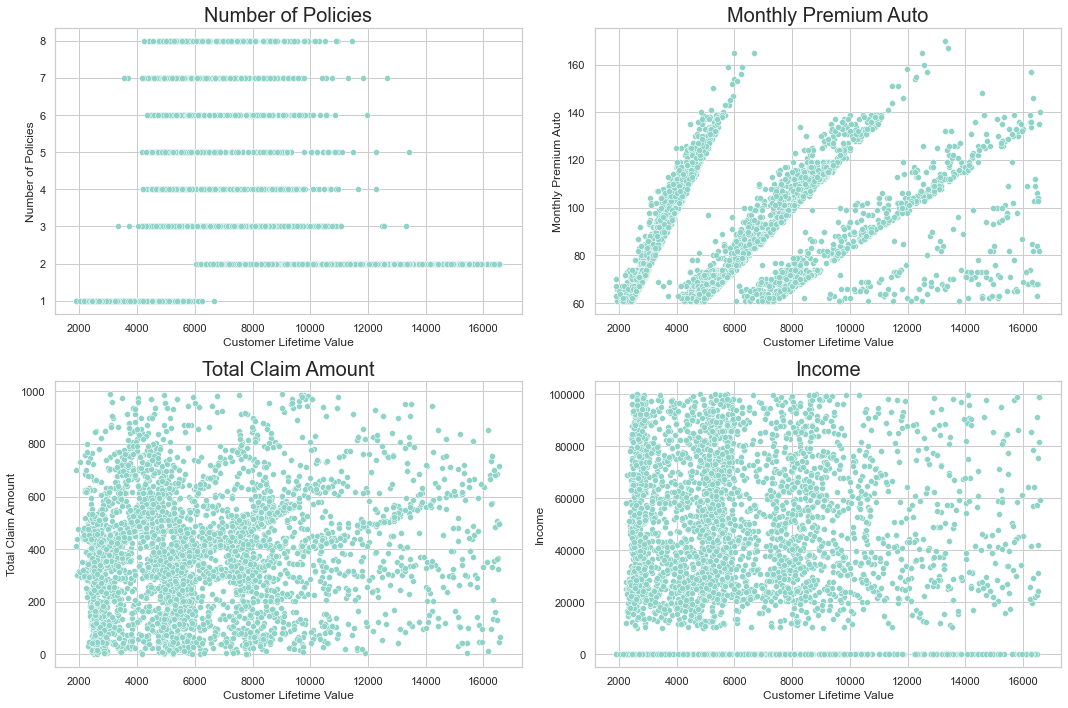

In [271]:
plt.figure(figsize=(15, 10), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in num_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.scatterplot(x = 'Customer Lifetime Value', y = feature, data = df_clv_cleaned)
    plt.xlabel('Customer Lifetime Value')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout();

<AxesSubplot:>

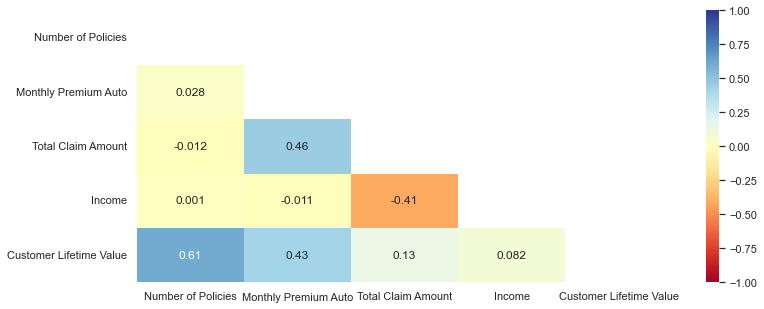

In [272]:
mask=np.triu(np.ones_like(df_clv_cleaned.corr(method = 'spearman'), dtype=np.bool_))

plt.figure(figsize=(12,5))
sns.heatmap(df_clv_cleaned.corr(method = 'spearman'), mask=mask, cmap='RdYlBu', annot=True, vmin=-1, vmax=1)

Berdasarkan grafik scatterplot dan heatmap diatas terlihat bahwa fitur numerik yang digunakan memiliki korelasi yang tergolong rendah. Diantara fitur-fitur tersebut yang memiliki nilai korelasi tertinggi adalah fitur Number of Policies dengan nilai 0.61. Sedangkan untuk fitur Monthly Premium Auto, Total Claim Amount, dan Income memiliki nilai korelasi berturut-turut 0.43, 0.13, dan 0.082.

# IV. Data Preparation

Sebelum melakukan pemodelan terlebih dahulu kita mempersiapkan data.

In [273]:
df_clv_cleaned.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


## a. Data Splitting

In [274]:
#splitting data

X = df_clv_cleaned.drop(['Customer Lifetime Value'], axis=1)
y = df_clv_cleaned['Customer Lifetime Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
df_clv_cleaned_train = pd.concat([X_train, y_train], axis=1)
df_clv_cleaned_test = pd.concat([X_test, y_test], axis=1)

Spliting data ini dilakukan untuk memisahkan kolom data target dengan kolom data variabelnya. Yang mana kolom data target (y) ini adalah kolom Customer Lifetime Value. Sedangkan kolom lainnya menjadi kolom data variabel (X).

Lalu untuk train test split kita menggunakan 80% data sebagai training set nya dan 20% data sebagai test set nya dengan random state yaitu 100.

## b. Data Transform

In [275]:
#pengelompokan kolom

ctg_cols = ['Vehicle Class','Coverage','Renew Offer Type','EmploymentStatus','Marital Status']
ord_cols = [{'col':'Education', 'mapping':{'High School or Below':1,'College':2,'Bachelor':3,'Master':4,'Doctor':5}}]
num_cols = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

#transform kolom data dengan encoding

ordinal = ce.OrdinalEncoder(mapping=ord_cols)
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, ctg_cols),
                                ('Ordinal', ordinal,['Education'])],
                                remainder = 'passthrough')

Transformasi data ini dilakukan untuk mengubah data-data yang berbentuk katogerik menjadi data numerik, sehingga akan memudahkan kita dalam melakukan pemodelan machine learning. Untuk merepresentasikan data kategorik dalam machine learning ini kita akan menggunakan metode encoding.

Sebelumnya kita akan mengelompokkan terlebih dahulu jenis-jenis data di tiap variabel. Untuk data numerik kita kelompokkan tersendiri menjadi kolom numerik (num_cols). Lalu untuk data kategorik terbagi menjadi 2 jenis yaitu nominal dan ordinal. Data nominal adalah data kategorik yang tidak memiliki urutan. Disini kita kelompokkan manjadi kolom baru yaitu ctg_cols. Sedangkan data ordinal adalah data kategorik yang memiliki makna tertentu ketika diurutkan. Disini kita kelompokkan menjadi kolom baru yaitu ord_cols.

Kemudian pada proses encoding, kita menggunakan dua jenis encoding. Untuk data nomial kita menggunakan jenis one hot encoding. Sedangkan untuk data ordinal kita menggunakan jenis ordinal encoding.

# V. Model Training

In [276]:
lin_reg = LinearRegression()
knn = KNeighborsRegressor()
random = RandomForestRegressor()

lin_reg_pipeline = Pipeline([
    ('col_transformer', transformer),
    ('lin_reg', lin_reg)
])

knn_pipeline = Pipeline([
    ('col_transformer', transformer),
    ('knn_reg', knn)
])

random_pipeline = Pipeline([
    ('col_transformer', transformer),
    ('random_reg', random)
])

Disini kita akan melakukan pengujian terhadap tiga model algoritma machine learning antara lain Linear Regression, K-Nearest Neighbour (KNN) dan Random Forest. Dari ketiga model tersebut nantinya kita akan pilih satu model terbaik. Pemilihan model terbaik dapat dilakukan dengan melihat evaluasi metrik di tiap-tiap model. Selain itu, dalam pemodelan ini kita juga perlu menggunakan pipeline. Hal ini dilakukan untuk menyederhanakan proses algorithm chain. Pipeline akan sangat berguna ketika kita ingin menerapkan algorithm chains dalam cross validasi dan prediksi hasil akhir.

# VI. Evaluation Metrics

In [277]:
df_results = pd.DataFrame()

for pipeline_ in [lin_reg_pipeline, knn_pipeline, random_pipeline]:
    current_step_name = list(pipeline_.named_steps.keys())[1]
    cv_scores = cross_validate(pipeline_, X_train, y_train, cv=5, scoring=('r2',
                                                                           'neg_root_mean_squared_error',
                                                                           'neg_mean_squared_error',
                                                                           'neg_mean_absolute_error'), 
                               return_train_score=True)
    df_results = df_results.append({
        'algorithm': pipeline_.named_steps[current_step_name].__class__.__name__,
        'R-squared (train)': cv_scores['train_r2'].mean(),
        'R-squared (val)': cv_scores['test_r2'].mean(),
        'RMSE (train)': cv_scores['train_neg_root_mean_squared_error'].mean() * -1,
        'RMSE (val)': cv_scores['test_neg_root_mean_squared_error'].mean() * -1,
        'MSE (train)': cv_scores['train_neg_mean_squared_error'].mean() * -1,
        'MSE (val)': cv_scores['test_neg_mean_squared_error'].mean() * -1,
        'MAE (train)': cv_scores['train_neg_mean_absolute_error'].mean() * -1,
        'MAE (val)': cv_scores['test_neg_mean_absolute_error'].mean() * -1,
    }, ignore_index=True)

In [278]:
df_results

,algorithm,R-squared (train),R-squared (val),RMSE (train),RMSE (val),MSE (train),MSE (val),MAE (train),MAE (val)
0,LinearRegression,0.256553,0.248572,2786.779880,2799.869114,7.766388e+06,7.843382e+06,2081.416276,2092.195063
1,KNeighborsRegressor,0.277286,-0.103700,2747.608366,3393.124009,7.550195e+06,1.152059e+07,2134.177398,2654.613633
2,RandomForestRegressor,0.986169,0.904407,380.031835,997.906764,1.445208e+05,9.975807e+05,147.724293,397.530221


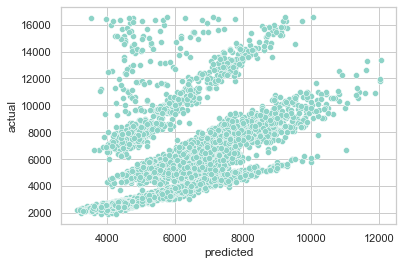

In [279]:
#scatterplot Linear Regression

lin_reg_pipeline.fit(X_train, y_train)
y_pred_train = lin_reg_pipeline.predict(X_train)

sns.scatterplot(x=y_pred_train, y=y_train)
plt.xlabel('predicted')
plt.ylabel('actual');

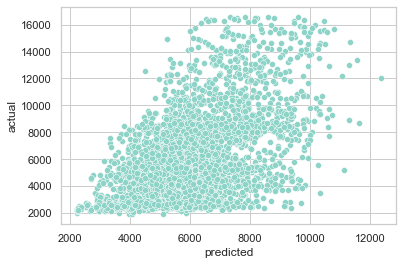

In [280]:
#scatterplot KNN

knn_pipeline.fit(X_train, y_train)
y_pred_train = knn_pipeline.predict(X_train)

sns.scatterplot(x=y_pred_train, y=y_train)
plt.xlabel('predicted')
plt.ylabel('actual');

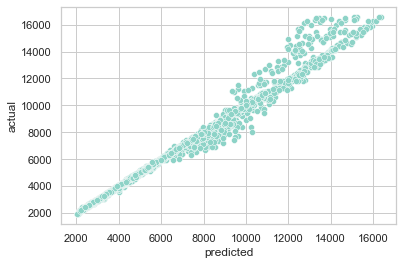

In [281]:
#scatterplot Random Forest

random_pipeline.fit(X_train, y_train)
y_pred_train = random_pipeline.predict(X_train)

sns.scatterplot(x=y_pred_train, y=y_train)
plt.xlabel('predicted')
plt.ylabel('actual');

Dari ketiga model algoritma yang telah diuji, dapat disimpulkan bahwa model Random Forest menjadi model yang terbaik diantara ketiganya. Hal ini terlihat dari nilai R-Squared yang dihasilkan jauh lebih tinggi dibandingkan dengan kedua model lainnya, serta nilai eror yang jauh lebih kecil dibandingkan yang lain. Selain itu dari hasil grafik scatterplot yang dibuat juga model Random Forest memiliki sebaran plot yang lebih baik dibandingkan kedua model lainnya. Sehingga untuk pengujian selanjutnya kita akan berfokus pada model Random Forest.

# VII. Hyperparameter Tuning

In [282]:
def evaluation_metrics(y_true, y_preds):
    '''
    A function to compute and return the evaluation metrics in the form of a dictionary.
    '''
    r2 = r2_score(y_true, y_preds)
    rmse = np.sqrt(mean_squared_error(y_true, y_preds))
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    
    metrics = {'r2_score' : r2,
               'root_mean_squared error' : round(rmse, 2),
               'mean absolute error' : round(mae, 2),
               'mean_squared error' : round(mse, 2)}
    
    print(f'R2_score: {r2 * 100:.2f}%')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    
    return metrics

In [283]:
#Hyperparameter Tuning dengan RandomizedSearchCV

X = df_clv_cleaned.drop('Customer Lifetime Value', axis = 1)
y = df_clv_cleaned['Customer Lifetime Value']

mapping = [{'col':'Education', 'mapping':{'High School or Below':1,'College':2,'Bachelor':3,'Master':4,'Doctor':5}}]
ordinal = ce.OrdinalEncoder(mapping=mapping)
categories = ['Vehicle Class','Coverage','Renew Offer Type','EmploymentStatus','Marital Status']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categories),
                                ('Ordinal', ordinal,['Education'])],
                                remainder = 'passthrough')

X_transformed = transformer.fit_transform(X)

np.random.seed(94)

X_train, X_val_test, y_train, y_val_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 100)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

model = RandomForestRegressor(n_jobs = -1)

grid = {'n_estimators' : [10, 100, 200, 500, 1000, 1200],
        'max_depth' : [None, 5, 10, 20, 30],
        'max_features' : ['auto', 'sqrt'],
        'min_samples_split' : [2, 4, 6 ],
        'min_samples_leaf' : [1, 2, 4]}

rs_model = RandomizedSearchCV(estimator = model, 
                              param_distributions = grid,
                              n_iter = 10,
                              cv = 5,
                              verbose = 2)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [300]:
#cek parameter terbaik

rs_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [301]:
#membuat prediksi dengan model randomized search pada validation set

rs_y_preds = rs_model.predict(X_val)

In [302]:
#mengevaluasi hasil CV randomized search

rs_metrics = evaluation_metrics(y_val, rs_y_preds)

R2_score: 89.71%
RMSE: 1086.93
MAE: 432.06
MSE: 1181407.80


Dari hasil hyperparameter tuning dengan metode Randomized Search kita telah menemukan parameter terbaik dari model algortima Random Forest. Parameter terbaik yang dihasilkan adalah n_estimators sebesar 1200, min_samples_split sebanyak 6, min_samples_leaf sebanyak 2, max_faetures auto, dan nilai max_depth sebesar 10.

Selain itu hasil validation set sebelum hyperparameter tuning dengan setelah hyperparameter tuning juga tidak lah jauh. Dimana untuk model sebelum tuning menghasilkan nilai metrik R-Squared sebesar 90.54% dengan nilai MAE sebesar 393.96. Sedangkan untuk model algoritma setelah tuning menghasilkan nilai metrik R-Squared sebesar 89.71% dengan nilai MAE sebesar 432.06.

In [303]:
#menerapkan model pada tes set

rs_test_preds = rs_model.predict(X_test)

#mengevalusi model pada tes set

rs_test_metrics = evaluation_metrics(y_test, rs_test_preds)

R2_score: 92.17%
RMSE: 831.54
MAE: 321.42
MSE: 691455.26


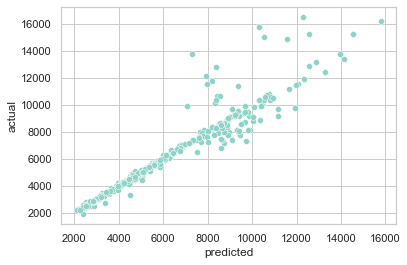

In [304]:
sns.scatterplot(x=rs_test_preds, y=y_test)
plt.xlabel('predicted')
plt.ylabel('actual');

In [305]:
# individual error inspection
pd.DataFrame({
    'predicted': rs_test_preds,
    'actual': y_test,
    'abs_residual': abs(rs_test_preds - y_test)
}).sort_values(by='abs_residual', ascending=False)

,predicted,actual,abs_residual
582,7273.802658,13786.702720,6512.900062
3910,10292.757410,15777.887020,5485.129610
2492,10512.546872,15002.603080,4490.056208
4095,8360.367169,12807.090830,4446.723661
4769,12289.698367,16525.380670,4235.682303
...,...,...,...
4088,3766.864603,3768.086327,1.221724
381,5559.059204,5557.934118,1.125086
5077,2453.706395,2454.589361,0.882966
2210,2893.995569,2894.327413,0.331844


In [306]:
#sampel data eror tertinggi

df_clv_cleaned.loc[[582, 3910, 2492]]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
582,Four-Door Car,Basic,Offer1,Unemployed,Married,High School or Below,2.0,61.0,370.755025,0.0,13786.70272
3910,Two-Door Car,Basic,Offer2,Employed,Married,High School or Below,2.0,65.0,289.894293,98713.0,15777.88702
2492,Four-Door Car,Extended,Offer2,Disabled,Single,High School or Below,2.0,84.0,604.800000,19245.0,15002.60308


In [307]:
#sampel data eror terendah

df_clv_cleaned.loc[[5077, 2210, 363]]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
5077,Two-Door Car,Basic,Offer2,Unemployed,Single,Bachelor,1.0,72.0,518.400000,0.0,2454.589361
2210,Two-Door Car,Basic,Offer2,Employed,Married,College,1.0,73.0,166.549200,52674.0,2894.327413
363,Four-Door Car,Extended,Offer1,Unemployed,Married,Bachelor,1.0,96.0,438.661509,0.0,3571.346578


Setelah dilakukan pemodelan pada tes set, model ini mampu menjelaskan sekitar 92.17% dari varians data skor Customer Lifetime Value, dengan kesalahan absolut rata-rata 321.42 (kesalahan prediksi akan menjadi sekitar 321.42 per pelanggan).

# VIII. Conclusion and Recommendation

Model Regresi Linier dengan Random Forest menjadi model yang terbaik untuk data ini dengan koefisien determinasi 92.17%  dan kesalahan absolut rata-rata 321.42, yang berati model regresi ini mampu mempresentasikan data dengan baik sebesar 92.17%. Dengan hasil yang cukup tinggi ini, dapat diyakini bahwa model ini mampu untuk digunakan pada proses prediksi skor Customer Lifetime Value pelanggan di masa depan.

Pada hyperparameter tuning dengan RandomizedSearch, parameter terbaik yang dihasilkan adalah *{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}*. Jika masih ingin mencoba meng-improve model Random Forest ini, kita bisa coba melakukan tuning pada scaler.
 
Dari fitur-fitur yang ada memang tidak memiliki korelasi yang signifikan terhadap nilai Customer Lifetime Value (CLV) suatu pelanggan. Sebaiknya perusahaan perlu menambahkan lagi fitur-fitur yang mampu meningkatkan prediksi nilai CLV pelanggan, seperti jumlah tanggungan keluarga atau jumlah pengeluaran kebutuhan masing-masing pelanggan.